![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

The Finance Toolkit is complimented very well with the [Finance Database 🌎](https://github.com/JerBouma/FinanceDatabase), a database that features 300.000+ symbols containing Equities, ETFs, Funds, Indices, Currencies, Cryptocurrencies and Money Markets. By utilising both, it is possible to do a fully-fledged competitive analysis with the tickers found from the FinanceDatabase inputted into the Finance Toolkit.

To install the **FinanceDatabase** it simply requires the following:

```
pip install financedatabase -U
```

From within Python use:

```python
import financedatabase as fd
```

For a detailed explanation of how to use the Finance Database, please see the GitHub page as found [here](https://github.com/JerBouma/FinanceDatabase).

To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://site.financialmodelingprep.com/developer/docs/pricing/jeroen/">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use [their contact form](https://site.financialmodelingprep.com/contact) or provide the data yourself. 

In [1]:
from financetoolkit import Toolkit
import financedatabase as fd

API_KEY = "FINANCIAL_MODELING_PREP_KEY"

Lets start with searching for companies matching the industry `Road & Rail` in the `United States` that are defined as `Large Cap`.

In [2]:
# Initialize the Equities database
equities = fd.Equities()

# Obtain related companies
road_and_rail = equities.search(
    industry="Road & Rail",
    country="United States",
    market_cap="Large Cap",
    exclude_exchanges=True,
)

# Show the related DataFrame
road_and_rail

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
CSX,CSX Corporation,"CSX Corporation, together with its subsidiarie...",USD,Industrials,Transportation,Road & Rail,NMS,NASDAQ Global Select,United States,FL,Jacksonville,32202,http://www.csx.com,Large Cap,US1264081035,126408103,BBG000BGK1N1,BBG000BGJRC8,BBG001S5Q7Q3
KSU,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
KSU-P,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
NSC,Norfolk Southern Corporation,"Norfolk Southern Corporation, together with it...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,VA,Norfolk,23510-2191,http://www.norfolksouthern.com,Large Cap,US6558441084,655844108,BBG000BQ5GM4,BBG000BQ5DS5,BBG001S5TQJ6
UNP,Union Pacific Corporation,"Union Pacific Corporation, through its subsidi...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,NE,Omaha,68179,http://www.up.com,Large Cap,US9078181081,907818108,BBG000BW3413,BBG000BW3299,BBG001S5X2M0
WAB,Westinghouse Air Brake Technologies Corporation,Westinghouse Air Brake Technologies Corporatio...,USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212,http://www.wabteccorp.com,Large Cap,US9297401088,929740108,BBG000BDDBD5,BBG000BDD940,BBG001S5XBT3


It appears that Kansas City Southern has been merged with Canadian Pacific Railway ([source](https://www.kcsouthern.com/media/news/news-releases/canadian-pacific-and-kansas-city-southern-combination-approved-by-u-s-surface-transportation-board)). Because of this, the ticker is taken out. The reason it still exists in the dataset of the FinanceDatabase is to control for survivorship bias.

In [3]:
road_and_rail = road_and_rail.drop(["KSU", "KSU-P"])

From here on, the tickers from the dataset are used to initialize the Finance Toolkit.

In [4]:
rail_companies = Toolkit(list(road_and_rail.index), api_key=API_KEY)

Let's start by showing the historical prices and plotting them accordingly.

Adj Close                                          Close  \
                  CSX         NSC         UNP         WAB        CSX   
Date                                                                   
2023-08-10  30.920000  217.490005  230.300003  113.700005  30.920000   
2023-08-11  30.750000  215.910004  229.490005  114.190002  30.750000   
2023-08-14  30.820000  215.429993  229.800003  114.129997  30.820000   
2023-08-15  30.280001  208.850006  225.539993  112.580002  30.280001   
2023-08-16  30.190001  207.639999  224.619995  111.839996  30.190001   

                                               Cumulative Return            \
                   NSC         UNP         WAB               CSX       NSC   
Date                                                                         
2023-08-10  217.490005  230.300003  113.870003          3.403907  2.716151   
2023-08-11  215.910004  229.490005  114.190002          3.379694  2.689155   
2023-08-14  215.429993  229.800003  114.129997          3.389664  2.680953   
2023-08-15  208.850006  225.539993  112.580002          3.312752  2.568524   
2023-08-16  207.639999  224.619995  111.839996          3.299934  2.547849   

            ...        Open                Return                      \
            ...         UNP         WAB       CSX       NSC       UNP   
Date        ...                                                         
2023-08-10  ...  229.970001  114.470001 -0.006107 -0.002339  0.004580   
2023-08-11  ...  229.750000  113.570000 -0.005498 -0.007265 -0.003517   
2023-08-14  ...  228.669998  113.989998  0.002276 -0.002223  0.001351   
2023-08-15  ...  228.839996  113.519997 -0.017521 -0.030544 -0.018538   
2023-08-16  ...  225.350006  112.860001 -0.002972 -0.005794 -0.004079   

                        Volume                            
                 WAB       CSX      NSC      UNP     WAB  
Date                                                      
2023-08-10 -0.002802   9687400   967500  2737700  435800  
2023-08-11  0.004310  12305100  1192700  2346200  503800  
2023-08-14 -0.000525  12786200   834300  1682100  500200  
2023-08-15 -0.013581  10972100  1467300  2146200  714700  
2023-08-16 -0.006573   8296100  1008000  2169200  546900  

[5 rows x 36 columns]

<Axes: title={'center': 'Cumulative Returns for the Rail Companies'}, xlabel='Date'>

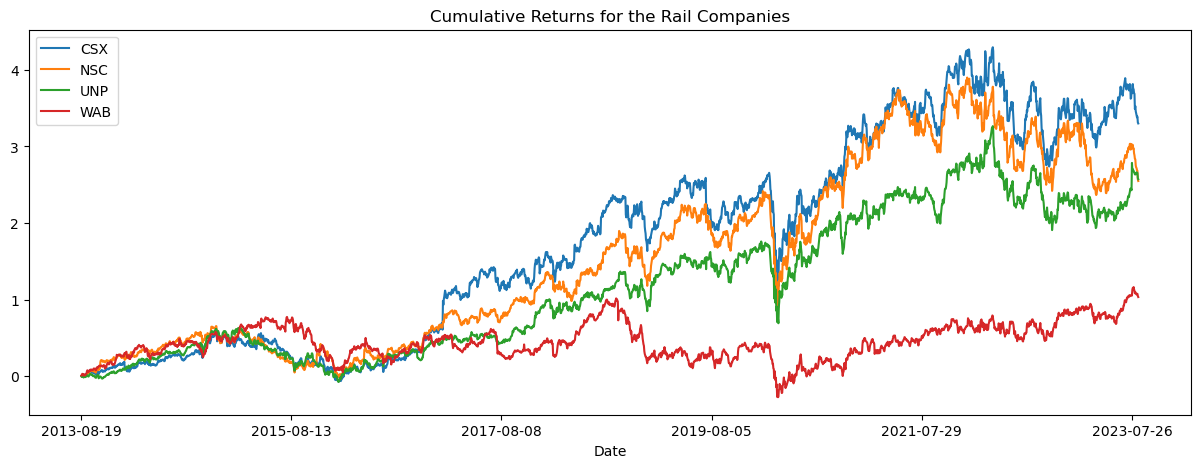

In [5]:
# Collect Historical Data for each ticker
historical_data = rail_companies.get_historical_data()

# Show a portion of the dataset
display(historical_data.tail(5))

# Plot the Cumulative Returns
historical_data["Cumulative Return"].plot(figsize=(15, 5), title="Cumulative Returns for the Rail Companies")

Let's have a look at the Balance Sheet Statement as well.

In [6]:
# Collect and show the Balance Sheet Statements
rail_companies.get_balance_sheet_statement()

date                                         1985          1986         1987  \
CSX Cash and Cash Equivalents        187000000.00  315000000.00 921000000.00   
    Short Term Investments                   0.00          0.00         0.00   
    Cash and Short Term Investments  187000000.00  315000000.00 921000000.00   
    Accounts Receivable             1299000000.00 1182000000.00 876000000.00   
    Inventory                        428000000.00  356000000.00 363000000.00   
...                                           ...           ...          ...   
WAB Minority Interest                         NaN           NaN          NaN   
    Total Liabilities and Equity              NaN           NaN          NaN   
    Total Investments                         NaN           NaN          NaN   
    Total Debt                                NaN           NaN          NaN   
    Net Debt                                  NaN           NaN          NaN   

date                                        1988         1989         1990  \
CSX Cash and Cash Equivalents       625000000.00 534000000.00 609000000.00   
    Short Term Investments                  0.00         0.00         0.00   
    Cash and Short Term Investments 625000000.00 534000000.00 609000000.00   
    Accounts Receivable             896000000.00 645000000.00 728000000.00   
    Inventory                       241000000.00 237000000.00 257000000.00   
...                                          ...          ...          ...   
WAB Minority Interest                        NaN          NaN          NaN   
    Total Liabilities and Equity             NaN          NaN          NaN   
    Total Investments                        NaN          NaN          NaN   
    Total Debt                               NaN          NaN          NaN   
    Net Debt                                 NaN          NaN          NaN   

date                                        1991         1992         1993  \
CSX Cash and Cash Equivalents       465000000.00 530000000.00 298000000.00   
    Short Term Investments                  0.00         0.00         0.00   
    Cash and Short Term Investments 465000000.00 530000000.00 298000000.00   
    Accounts Receivable             728000000.00 605000000.00 668000000.00   
    Inventory                       206000000.00 189000000.00 199000000.00   
...                                          ...          ...          ...   
WAB Minority Interest                        NaN          NaN         0.00   
    Total Liabilities and Equity             NaN          NaN 175600000.00   
    Total Investments                        NaN          NaN         0.00   
    Total Debt                               NaN          NaN 107900000.00   
    Net Debt                                 NaN          NaN 107900000.00   

date                                        1994  ...          2013  \
CSX Cash and Cash Equivalents       265000000.00  ...  592000000.00   
    Short Term Investments          270000000.00  ...  487000000.00   
    Cash and Short Term Investments 535000000.00  ... 1079000000.00   
    Accounts Receivable             706000000.00  ... 1052000000.00   
    Inventory                       211000000.00  ...  252000000.00   
...                                          ...  ...           ...   
WAB Minority Interest                       0.00  ...    1908000.00   
    Total Liabilities and Equity    187700000.00  ... 2821997000.00   
    Total Investments                       0.00  ...          0.00   
    Total Debt                       78100000.00  ...  450709000.00   
    Net Debt                         77100000.00  ...  164949000.00   

date                                         2014          2015          2016  \
CSX Cash and Cash Equivalents        669000000.00  628000000.00  603000000.00   
    Short Term Investments           292000000.00  810000000.00  417000000.00   
    Cash and Short Term Investments  961000000.00 1438000000.00 10200

A very important financial ratio is the "Operating Ratio" for railroad companies. An operating ratio of 80 or lower has generally been seen as good but having a target as low as the mid-70s is even better. From the table below, it is clear that all companies except for WAB (Westinghouse Air Brake Technologies Corporation) are performing very well. This, however, makes sense since WAB is specialized on providing parts instead of actual railroad services.

In [7]:
# Collect and show the Balance Sheet Statements
rail_companies.ratios.get_operating_ratio()

The following data was not provided within the Toolkit class and thus was retrieved from FinancialModelingPrep: Income Statement, Cash Flow Statement.


date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,0.8796,0.8366,0.8887,0.8803,0.8878,0.9007,0.9885,0.9695,0.8979,1.5787,...,0.7095,0.7129,0.7049,0.6980,0.6711,0.6164,0.5991,0.5896,0.5958,0.6195
NSC,0.8120,0.8278,0.9745,0.7881,0.8181,0.8250,0.9748,0.8076,0.8071,0.8971,...,0.7104,0.6924,0.7256,0.6891,0.6601,0.6545,0.6469,0.6540,0.6009,0.6227
UNP,0.8453,0.6641,0.6125,0.7541,0.7754,0.7701,0.7661,0.7764,0.8162,0.7894,...,0.6610,0.6351,0.6309,0.6353,0.6205,0.6270,0.6060,0.5989,0.5717,0.6013
WAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7816,0.7433,...,0.8296,0.8269,0.8163,0.8436,0.8915,0.8915,0.9191,0.9015,0.8880,0.8791


Other than this ratio, important other metrics are revenue growth, strong profit margins and efficient capital management. These can be explored further by looking into the income statement, the profit margin ratio and the current ratio.

In [8]:
# Obtain the income statement and select the revenues
revenues = rail_companies.get_income_statement().loc[:, "Revenue", :]

# Show revenue absolute numbers for each company
display(revenues)

# Show the revenue growth for each company
rail_companies.get_income_statement(growth=True).loc[:, "Revenue", :]

date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,7320000000.00,6345000000.00,8043000000.00,7592000000.00,7745000000.00,8205000000.00,8636000000.00,8734000000.00,8940000000.00,9608000000.00,...,12026000000.00,12669000000.00,11811000000.00,11069000000.00,11408000000.00,12250000000.00,11937000000.00,10583000000.00,12522000000.00,14853000000.00
NSC,3825100000.00,4076400000.00,4112800000.00,4461600000.00,4536000000.00,4617000000.00,4451300000.00,4606600000.00,4460100000.00,4581300000.00,...,11245000000.00,11624000000.00,10511000000.00,9888000000.00,10551000000.00,11458000000.00,11296000000.00,9789000000.00,11142000000.00,12745000000.00
UNP,7798000000.00,6574000000.00,5943000000.00,6068000000.00,6492000000.00,6964000000.00,7029000000.00,7294000000.00,7561000000.00,7798000000.00,...,21963000000.00,23988000000.00,21813000000.00,19941000000.00,21240000000.00,22832000000.00,21708000000.00,19533000000.00,21804000000.00,24875000000.00
WAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285300000.00,347500000.00,...,2566392000.00,3044454000.00,3307998000.00,2931188000.00,3881756000.00,4363547000.00,8200000000.00,7556100000.00,7822000000.00,8362000000.00


date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CSX,NaN,-0.1332,0.2676,-0.0561,0.0202,0.0594,0.0525,0.0113,0.0236,0.0747,...,0.0230,0.0535,-0.0677,-0.0628,0.0306,0.0738,-0.0256,-0.1134,0.1832,0.1862
NSC,NaN,0.0657,0.0089,0.0848,0.0167,0.0179,-0.0359,0.0349,-0.0318,0.0272,...,0.0186,0.0337,-0.0958,-0.0593,0.0671,0.0860,-0.0141,-0.1334,0.1382,0.1439
UNP,NaN,-0.1570,-0.0960,0.0210,0.0699,0.0727,0.0093,0.0377,0.0366,0.0313,...,0.0496,0.0922,-0.0907,-0.0858,0.0651,0.0750,-0.0492,-0.1002,0.1163,0.1408
WAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2180,...,0.0733,0.1863,0.0866,-0.1139,0.3243,0.1241,0.8792,-0.0785,0.0352,0.0690


Profit Margins can be looked at from a variety of perspectives. The Finance Toolkit features Gross, Operating, Net Profit and EBT Profit Margins. With the `collect_profitability_ratios` functions within the `ratios` module these can be collected for each company accompanied with many other useful ratios. To provide an appropriate overview, the profitability ratios are only shown for `CSX`.

In [9]:
# Collect the profitability ratios and select the ratios for CSX
rail_companies.ratios.collect_profitability_ratios().loc["CSX"]

date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gross Margin,0.1762,0.2177,0.1789,0.1812,0.1699,0.1570,0.0695,0.0908,0.1661,0.4100,...,0.2888,0.2852,0.3034,0.3062,0.3307,0.3896,0.4083,0.4122,0.4105,0.3895
Operating Margin,0.1204,0.1634,0.1113,0.1197,0.1122,0.0993,0.0115,0.0305,0.1021,0.1282,...,0.2888,0.2852,0.3034,0.3062,0.3214,0.3975,0.4159,0.4122,0.4467,0.4055
Net Profit Margin,-0.0161,0.0659,0.0537,-0.0043,0.0554,0.0444,-0.0088,0.0023,0.0402,0.0679,...,0.1550,0.1521,0.1666,0.1548,0.4796,0.2701,0.2790,0.2613,0.3019,0.2805
Interest Coverage Ratio,inf,inf,inf,inf,inf,inf,-inf,-inf,inf,inf,...,8.1441,8.7413,8.8088,8.1002,9.1245,9.7027,8.6866,7.6446,9.1953,9.9973
Income Before Tax Profit Margin,-0.0359,0.1149,0.0848,-0.0079,0.0893,0.0654,-0.0131,-0.0008,0.0708,0.1047,...,0.2430,0.2403,0.2657,0.2476,0.2754,0.3513,0.3616,0.3427,0.3954,0.3645
Effective Tax Rate,0.5513,0.4266,0.3666,0.3667,0.3829,0.3203,0.3274,3.8571,0.4329,0.3519,...,0.3621,0.3670,0.3728,0.3747,-0.7412,0.2312,0.2282,0.2377,0.2363,0.2305
Return on Assets (ROA),-0.0103,0.0330,0.0327,-0.0025,0.0349,0.0284,-0.0059,0.0015,0.0268,0.0475,...,0.0586,0.0583,0.0562,0.0484,0.1531,0.0901,0.0871,0.0695,0.0933,0.0994
Return on Equity (ROE),NaN,0.0883,0.0888,-0.0081,0.1292,0.1049,-0.0226,0.0065,0.1167,0.1887,...,0.1911,0.1778,0.1723,0.1467,0.4142,0.2424,0.2726,0.2214,0.2842,0.3189
Return on Invested Capital (ROIC),NaN,NaN,NaN,NaN,0.0538,0.0502,0.0072,-0.0786,0.0448,0.0790,...,0.0784,0.0773,0.0744,0.0651,0.4055,0.1142,0.1124,0.0911,0.1181,0.1259
Return on Capital Employed (ROCE),-0.0276,0.0674,0.0602,-0.0055,0.0696,0.0510,-0.0109,-0.0007,0.0568,0.0897,...,0.1187,0.1160,0.1113,0.0995,0.1090,0.1420,0.1399,0.1160,0.1481,0.1561


Capital Management can be viewed from multiple angles including liquidity, accounts receivable, inventory and accounts payable management. These lead to the Operating and Cash Conversion Cycles. All of these ratios can be found within the `collect_efficiency_ratios` and `collect_liquidity_ratios` functions within the `ratios` module.

In [10]:
# Collect the liquidity ratios for all companies
rail_companies.ratios.collect_liquidity_ratios()

date                                             1985            1986  \
CSX Current Ratio                              1.0502          1.1375   
    Quick Ratio                                0.7613          0.8105   
    Cash Ratio                                 0.0958          0.1705   
    Working Capital                     98000000.0000  254000000.0000   
    Operating Cash Flow Ratio                     NaN             NaN   
    Operating Cash Flow to Sales Ratio            NaN             NaN   
    Short Term Coverage Ratio                     NaN             NaN   
NSC Current Ratio                              1.4349          1.6452   
    Quick Ratio                                1.2999          1.4400   
    Cash Ratio                                 0.7525          0.6868   
    Working Capital                    622600000.0000  679900000.0000   
    Operating Cash Flow Ratio                     NaN             NaN   
    Operating Cash Flow to Sales Ratio            NaN             NaN   
    Short Term Coverage Ratio                     NaN             NaN   
UNP Current Ratio                              1.0537          0.8666   
    Quick Ratio                                0.7221          0.5209   
    Cash Ratio                                 0.2701          0.1675   
    Working Capital                     90000000.0000 -239000000.0000   
    Operating Cash Flow Ratio                     NaN             NaN   
    Operating Cash Flow to Sales Ratio            NaN             NaN   
    Short Term Coverage Ratio                     NaN             NaN   
WAB Current Ratio                                 NaN             NaN   
    Quick Ratio                                   NaN             NaN   
    Cash Ratio                                    NaN             NaN   
    Working Capital                               NaN             NaN   
    Operating Cash Flow Ratio                     NaN             NaN   
    Operating Cash Flow to Sales Ratio            NaN             NaN   
    Short Term Coverage Ratio                     NaN             NaN   

date                                              1987            1988  \
CSX Current Ratio                               1.2592          0.7955   
    Quick Ratio                                 0.9468          0.4969   
    Cash Ratio                                  0.4852          0.2042   
    Working Capital                     492000000.0000 -626000000.0000   
    Operating Cash Flow Ratio                      NaN             NaN   
    Operating Cash Flow to Sales Ratio             NaN             NaN   
    Short Term Coverage Ratio                      NaN             NaN   
NSC Current Ratio                               1.5654          1.5522   
    Quick Ratio                                 1.3928          1.3423   
    Cash Ratio                                  0.6602          0.5337   
    Working Capital                     685000000.0000  659700000.0000   
    Operating Cash Flow Ratio                      NaN             NaN   
    Operating Cash Flow to Sales Ratio             NaN             NaN   
    Short Term Coverage Ratio                      NaN             NaN   
UNP Current Ratio                               0.8920          0.8962   
    Quick Ratio                                 0.5629          0.6188   
    Cash Ratio                                  0.1054          0.2360   
    Working Capital                    -169000000.0000 -193000000.0000   
    Operating Cash Flow Ratio                      NaN             NaN   
    Operating Cash Flow to Sales Ratio             NaN             NaN   
    Short Term Coverage Ratio                      NaN             NaN   
WAB Current Ratio                                  NaN             NaN   
    Quick Ratio                                    NaN             NaN   
    Cash Ratio                                     NaN             NaN   
    Working Capital             

In [11]:
# Collect the efficiency ratios for all companies
rail_companies.ratios.collect_efficiency_ratios()

date                                             1985     1986     1987  \
CSX Days of Inventory Outstanding (DIO)           NaN  28.8235  19.8694   
    Days of Sales Outstanding (DSO)               NaN  71.3605  46.6971   
    Operating Cycle (CC)                          NaN 100.1840  66.5665   
    Days of Accounts Payable Outstanding (DPO)    NaN   0.0000   0.0000   
    Cash Conversion Cycle (CCC)                   NaN 100.1840  66.5665   
    Receivables Turnover                          NaN   0.1955   0.1279   
    Inventory Turnover Ratio                      NaN  12.6633  18.3700   
    Accounts Payable Turnover Ratio               NaN      inf      inf   
    SGA-to-Revenue Ratio                       0.0000   0.0000   0.0000   
    Fixed Asset Turnover                          NaN   0.6344   0.7516   
    Asset Turnover Ratio                          NaN   0.5254   0.6213   
    Operating Ratio                            0.8796   0.8366   0.8887   
NSC Days of Inventory Outstanding (DIO)           NaN   8.9085   7.5613   
    Days of Sales Outstanding (DSO)               NaN  70.6200  74.6099   
    Operating Cycle (CC)                          NaN  79.5286  82.1712   
    Days of Accounts Payable Outstanding (DPO)    NaN   0.0000   0.0000   
    Cash Conversion Cycle (CCC)                   NaN  79.5286  82.1712   
    Receivables Turnover                          NaN   0.1935   0.2044   
    Inventory Turnover Ratio                      NaN  40.9719  48.2721   
    Accounts Payable Turnover Ratio               NaN      inf      inf   
    SGA-to-Revenue Ratio                       0.0909   0.0960   0.2368   
    Fixed Asset Turnover                          NaN   0.5182   0.5167   
    Asset Turnover Ratio                          NaN   0.4176   0.4208   
    Operating Ratio                            0.8120   0.8278   0.9745   
UNP Days of Inventory Outstanding (DIO)           NaN  63.2017  89.3085   
    Days of Sales Outstanding (DSO)               NaN  38.6154  41.4256   
    Operating Cycle (CC)                          NaN 101.8171 130.7341   
    Days of Accounts Payable Outstanding (DPO)    NaN   0.0000   0.0000   
    Cash Conversion Cycle (CCC)                   NaN 101.8171 130.7341   
    Receivables Turnover                          NaN   0.1058   0.1135   
    Inventory Turnover Ratio                      NaN   5.7752   4.0870   
    Accounts Payable Turnover Ratio               NaN      inf      inf   
    SGA-to-Revenue Ratio                       0.2887   0.2711   0.3648   
    Fixed Asset Turnover                          NaN   0.7203   0.6311   
    Asset Turnover Ratio                          NaN   0.6095   0.5457   
    Operating Ratio                            0.8453   0.6641   0.6125   
WAB Days of Inventory Outstanding (DIO)           NaN      NaN      NaN   
    Days of Sales Outstanding (DSO)               NaN      NaN      NaN   
    Operating Cycle (CC)                          NaN      NaN      NaN   
    Days of Accounts Payable Outstanding (DPO)    NaN      NaN      NaN   
    Cash Conversion Cycle (CCC)                   NaN      NaN      NaN   
    Receivables Turnover                          NaN      NaN      NaN   
    Inventory Turnover Ratio                      NaN      NaN      NaN   
    Accounts Payable Turnover Ratio               NaN      NaN      NaN   
    SGA-to-Revenue Ratio                          NaN      NaN      NaN   
    Fixed Asset Turnover                          NaN      NaN      NaN   
    Asset Turnover Ratio                          NaN      NaN      NaN   
    Operating Ratio                               NaN      NaN      NaN   

date                                              1988    1989     1990  \
CSX Days of Inventory Outstanding (DIO)        17.7333 13.5690  13.0338   
    Days of Sales Outstanding (DSO)            42.5962 36.3115  30.5390   
    Operating Cycle (CC)                       60.3294 49.8805  43.5728   
    Days of Accounts Pay